# Regression Analysis (I)

In this notebook, we see how regression analysis can help to **understand the data behavior**, to **predict data values** (continuous or dichotomous), and to **find important predictors** (sparse models).
We present different regression models: Simple linear regression, Multiple linear regression and Polynomial regression. 
We evaluate the results qualitatively by means of Seaborn visualization tools and quantitatively by means of Scikit-learn library, as well as other toolboxes.

We use different real data sets:
* Prediction of the Price of a New Housing Data Market
* Sea Ice Extent and Climate Change
* Diabetes Scikit-learn dataset
* Longley dataset of US macroeconomic data
* Advertising dataset

### Contents of the notebook:

- Regression
    - Simple Linear Regression
    - Multiple Linear Regression
    - Polynomial Regression
- OLS (Ordinary Least Squares)
- Fit evaluation (MSE, R^2)
- Prediction (Scikit-learn)
- Visualization (Seaborn lmplot)

## How to make predictions about real-world quantities.

+  How does sales volume change with changes in price? How is it affected by weather?
+  How does the amount of a drug absorbed vary with body weight of patient? Does it depend on blood pressure?
+  How many customers can I expect today?
+  At what time should I go home to avoid the traffic jam?
+  What is the chance of rain for next two Mondays? What is the expected temperature?

<center><img src="files/images/crystal_ball_s.jpg"></center>

### Example:
    
 
<center><img src="files/images/life-expectancy-vs-gdp-per-capita.png"></center>


You can find another interesting example [here](https://ourworldindata.org/grapher/life-expectancy-of-women-vs-life-expectancy-of-women?tab=chart&country=&region=World).


Before starting, we can define some settings for the notebook:

In [16]:
# Settings for the visualizations
import matplotlib.pylab as plt
%matplotlib inline 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [17]:
import numpy as np
import pandas as pd

In [18]:
seed = 12 # Let's make our predictions deterministic

### Notation

$x_i$ element of a vector, $\textbf{x}$ column vector, $\textbf{x'}$ (transpose of $\textbf{x}$) row vector, $X$ matrix.

### From Data to Models

All these questions have a common structure: we are asking about one variable $\textbf{y}$ (*response*) that can be expressed as a combination of one or more (independent) variables $\textbf{x}_i$ (commonly called *covariates* or *predictors* or *regressors*).

The role of regression is to build a model (formula) to predict the response from the covariates.

# Linear Regression Model

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly from the predictors $\textbf{x}_i$:

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} + \epsilon $$ 

The $a_i$ are termed *parameters* of the model or *coefficients* and $\epsilon$ is called *error term*, *disturbance term*, or *noise* (in contrast with the "signal" provided by the rest of the model). This variable captures all other factors which influence the dependent variable $ \textbf{y}$ other than the predictors $ \textbf{x}$. 

This equation can be rewritten in a more compact (matricial) form as

$$ \textbf{y}  = X \textbf{w} + \epsilon $$

where $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right), 
 X = \left( \begin{array}{c} x_{11}  \dots x_{1m} \\ x_{21}  \dots x_{2m}\\ \vdots \\ x_{n1}  \dots x_{nm} \end{array} \right),  \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right) 
 \epsilon = \left( \begin{array}{c} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_m \end{array} \right) $$
 
 **Linear regression** is the technique for creating linear models.
 
### Simple Linear Regression

In the **simple** linear regression, with a single variable, we describe the relationship between the predictor and the response with a straight line. 

The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 + \epsilon$$

The parameter $a_0$ is called the *constant term* or the *intercept*.

In the matricial form we add a constant term by changing to the matrix: $(\textbf{1},X).$


#### Example: 

Does the insurance price depend on the driving experience?

Given the following information, the monthly auto insurance prices ($\textbf{y}$) and driving experiences in years ($\textbf{x}_{1}$) of a set of n=8 subjects, we can build a linear model to answer this question.


<center><img src="files/images/data-insurance.png" width="500"></center>


<center><img src="files/images/price-insurance.png" width="500"></center>



We can also predict the monthly auto insurance price for a driver with 20 years of driving experience.



### Interpolation vs. extrapolation

In practice, when we do prediction for some value of x we haven’t seen before, we need to be very careful. Predicting $y$ for a value of $x$ that is within the interval of points that we saw in the original data (the data that we fit our model with) is called **interpolation**. Predicting y for a value of x that’s outside the range of values we actually saw for x in the original data is called **extrapolation**.
For real datasets, even if a linear fit seems appropriate, we need to be extremely careful about extrapolation, which can often lead to false predictions!


<center><img src="files/images/extrapolation.png"  width="500"></center>


### Multiple Regression
In Ordinary Least Squares Regression with a single variable we described the relationship between the predictor and the response with a straight line. This case is called *simple* linear regression. 

The simple linear regression can be extended to a higher number of variables. Having m preditor variables, we'll fit an m-dimensional hyperplane to our m predictors.

$$ \textbf{y} = a_1 \textbf{x}_1 + \dots + a_m \textbf{x}_m = X \textbf{w} $$


### Polynomial Regression

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

This very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. The higher the order of the polynomial the more "wigglier" functions you can fit. 

We can represent a curved relationship between our variables by introducing **polynomial** terms, as for example, a cubic model:


$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + a_3 x_i^3$$



Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

Example:

<center><img src="files/images/overfitting.png" width = '700'></center>



## Estimators


Let's generate a set of data to illsutrate simple linear regression

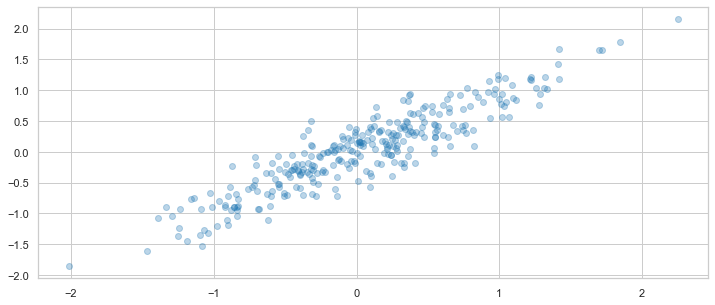

In [19]:
X1 = np.random.randn(300, 2)  # Random floats sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]]) # Transformation matrix
X2 = np.dot(X1, A)

X = X2[:, 0]
y = X2[:, 1]

plt.plot(X, y, "o", alpha=0.3) # alpha, transparency value, between 0 (transparent) and 1 (opaque).

We can create a linear model to explain the data

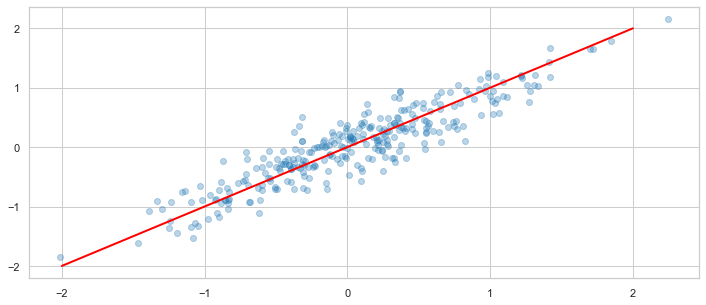

In [20]:
model=[0+1*x for x in np.arange(-2,3)] # np.arange returns evenly spaced values within a given interval.

plt.plot(X, y, "o", alpha=0.3);
plt.plot(np.arange(-2,3), model,'r'); 
plt.show()
# The red line gives the predicted values of this model

But there are other linear models. 


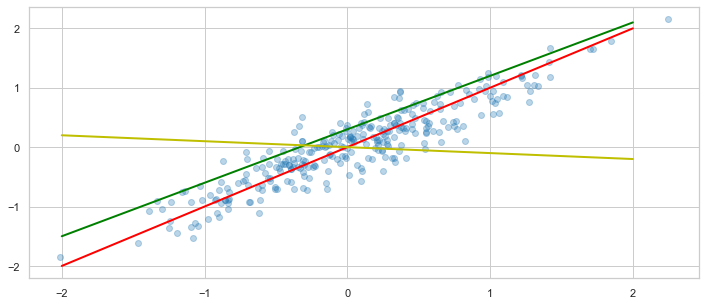

In [21]:
plt.plot(X, y, "o", alpha=0.3);
# We can use several parameters and we do not know which is the best model
model1=[0+1*x for x in np.arange(-2,3)]
model2=[0.3+0.9*x for x in np.arange(-2,3)]
model3=[0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1,'r')
plt.plot(np.arange(-2,3), model2,'g')
plt.plot(np.arange(-2,3), model3,'y')


#### Which is the best model for a set of samples?


### OLS (Ordinary Least Squares)

Consider the overdetermined system 

$$\textbf{y} = a_0+a_1 \textbf{x} $$

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the two $a$'s are chosen to minimize the sum of squared distance between the predicted values and the actual values. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.

#### How to compute the OLS: Scipy.optimize

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(0, 20)

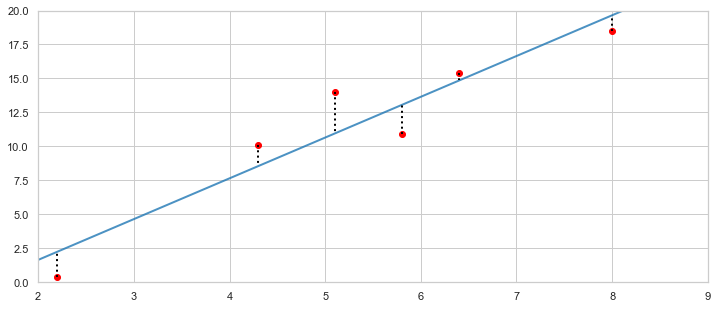

In [22]:
from scipy.optimize import fmin

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
 
# Minimize the sum of squares using a lambda function

sse = lambda a, x, y: np.sum((a[0] + a[1]*x - y) ** 2) # Store the sum of squared differences function
# Lambda function is a small anonymous function. 
# It can take any number of arguments, but can only have one expression. 
# Syntax "lambda arguments : expression"

a0,a1 = fmin(sse, [0,1], args=(x,y)); # Minimize the sum of squared differences
# [0,1] is the initial guess for a[0] and a[1] in function sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [a0, a0+a1*10], alpha=0.8) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, a0+a1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain

The pointed black lines illustrate the vertical errors which are minimized.

**Note**: There are alternatives of errors-in-variables regression models as the **total least squares**.

### Other estimators

We can minimize other criteria, such as the sum of absolute differences between the predicted values and the actual values (**sum of absolute errors (SAE)**). 

$$  \sum_{j=1}^n |a_0+a_1 x_{j} -  y_j|,$$ with respect to $a_0, a_1$.

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>
Try to fit a linear minimizing the SAE instead and make the same plot to visualize the results. What differences do you observe?

</div>

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77


(0, 20)

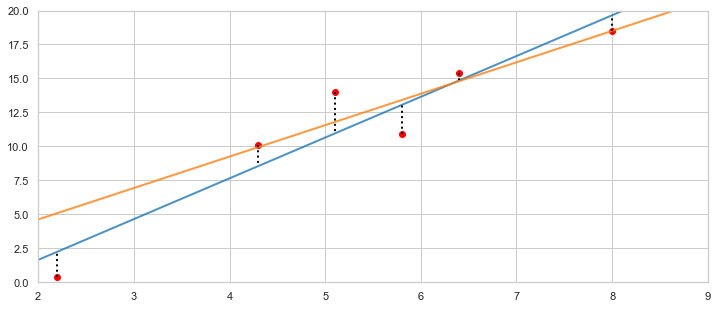

In [23]:
# Your code goes here

from scipy.optimize import fmin

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
 
# Minimize the sum of squares using a lambda function

sse = lambda a, x, y: np.sum((a[0] + a[1]*x - y) ** 2) # Store the sum of squared differences function
sae = lambda a, x, y: np.sum(abs(a[0] + a[1]*x - y))
# Lambda function is a small anonymous function. 
# It can take any number of arguments, but can only have one expression. 
# Syntax "lambda arguments : expression"

b0,b1 = fmin(sae, [0,1], args=(x,y)); # Minimize the sum of squared differences
# [0,1] is the initial guess for b[0] and b[1] in function sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [a0, a0+a1*10], alpha=0.8) # Add the regression line, colored in blue
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # Add the regression line, colored in orange
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, a0+a1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain



As you can see, in this case, far values are penalized less.

**OLS is a popular approach for several reasons**

+ It is computationally cheap to calculate the coefficients. 
+ It is easier to interpret than more sophisticated models. In situations where the goal is understanding a simple model in detail, rather than estimating the response well, they can provide insight into what the model captures. 
+ Finally, in situations where there is a lot of noise, it may be hard to find the true functional form, so a constrained model can perform quite well compared to a complex model which is more affected by noise.

The resulting model is represented as follows:

$$\widehat{\textbf{y}} = \widehat{a}_0+\widehat{a}_1 \textbf{x}$$

Here the hats on the variables represent the fact that they are estimated from the data we have available.

# Python Implementation with Scikit-learn

### Train and Test Split

One of the key aspects of supervised machine learning is model evaluation and validation. When you evaluate the predictive performance of your model, it’s essential that the process be unbiased. 

You can’t evaluate the predictive performance of a model with the same data you used for training. You need evaluate the model with fresh data that hasn’t been seen by the model before. You can accomplish that by splitting your dataset before you use it.

Using train_test_split() from the data science library scikit-learn, you can split your dataset into subsets that minimize the potential for bias in your evaluation and validation process.

#### Implementing Train and test split

In [24]:
# Create some dummy data
X1 = np.random.randn(12, 2)  # Random floats sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]]) # Transformation matrix
X2 = np.dot(X1, A)

X = X2[:, 0].reshape(-1,1) # X needs to be a 2D array as the input format for the model
y = X2[:, 1]

print('Size of X and y: {} {}'.format(X.shape, y.shape))
print(X)
print(y)

Size of X and y: (12, 1) (12,)
[[-0.32575652]
 [-1.13243896]
 [-0.35028341]
 [-0.27424028]
 [ 1.36471862]
 [ 0.63287654]
 [-0.31264883]
 [ 0.42535331]
 [ 0.44080092]
 [-0.28293759]
 [-0.88829959]
 [ 0.35955911]]
[-0.06446738 -1.48465677 -0.53451118 -0.17497546  0.78053712  0.53588008
 -0.1578785  -0.06144713  0.57206009 -0.48837135 -1.36711924  0.08185236]


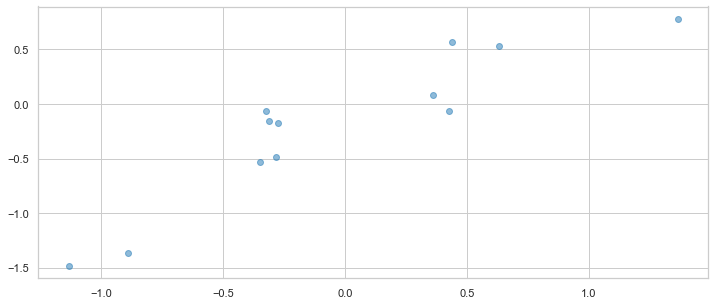

In [25]:
# Visualize our data
plt.plot(X, y, "o", alpha=0.5) # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.show()

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>
Split in train and test sets and check sizes.

</div>

In [26]:
from sklearn.model_selection import train_test_split

# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(12, 1) (9, 1) (3, 1)
(12,) (9,) (3,)


## Prediction

Let's make predictions using **Scikit-learn**. 

Scikit-learn is a library that provides a variety of both supervised and unsupervised machine learning techniques. Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. 

The <code>Estimator.fit</code> method sets the state of the estimator based on the *training data*. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called *feature matrix* and a one-dimensional numpy array $\textbf{y}$ that holds the *responses*. Some estimators allow the user to control the fitting behavior. 
Estimators that can generate predictions provide a ``Estimator.predict`` method. 
In the case of regression, ``Estimator.predict`` will return the predicted regression values, $\widehat{\textbf{y}}$. 

During the fitting process, the state of the estimator is stored in the instance attributes that have a trailing underscore (``'_'``). For example, the coefficients of a ``LinearRegression`` estimator are stored in the attribute ``coef_``. Let's see a toy example:

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>
Create the Linear Regression estimator and perform the fitting

</div>

In [27]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

-0.1337779410877583 [0.82288194]


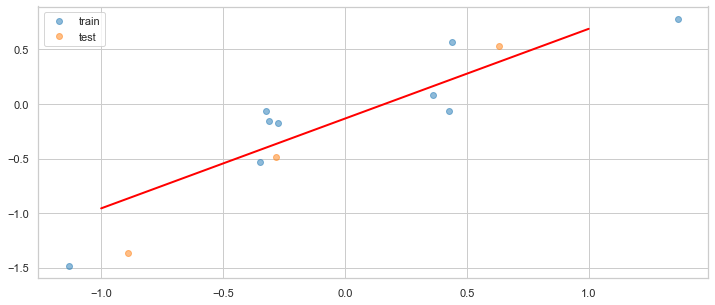

In [28]:
# Define xmin xmax for the model:
xmin, xmax = round(X.min()), round(X.max())

x_model = np.arange(xmin, xmax+1)
y_model=[lm.intercept_+lm.coef_*x for x in x_model] # np.arange returns evenly spaced values within a given interval.

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.legend()
plt.show()
# The red line gives the predicted values of this model

## Example 1: Boston Housing Data

The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. We want to predict the price of a market given a set of attributes.



In [29]:
from sklearn import datasets
boston = datasets.load_boston() # Dictionary-like object that exposes its keys as attributes.
X_boston,y_boston = boston.data, boston.target # Create X matrix and y vector from the dataset.
print('Shape of data: {} {}'.format(X_boston.shape, y_boston.shape))

Shape of data: (506, 13) (506,)


Boston dataset has 506 instances and 13 attributes. 
Let's see the content of the dataset which are the keys the attributes or features and the general description:

In [30]:
print('keys: {}'.format(boston.keys()))
print('feature names: {}'.format(boston.feature_names))
print(boston.DESCR)

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

In [31]:
# Create a DataFrame from the Boston dataset
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) 
df_boston['PRICE'] = boston.target

In [32]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We first consider the task of predicting **median house values** in the Boston area using as the predictor one of the attributes, for instance, **LSTAT**, defined as the "proportion of lower status of the population".

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>

<ul>
<li>Visualize the data we want to fit</li>
<li>Split your data in a train and a test set</li>
<li>Fit a simple linear regression using variable LSTAT to predict Price</li>
<li>How good is the regression?</li>
</ul>


</div>

First, lets visualize the data we want to fit

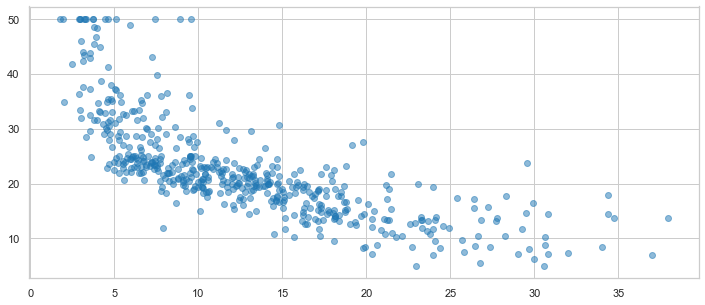

In [33]:
# Your code goes here
X = df_boston.LSTAT.values.reshape(-1, 1)
y = df_boston.PRICE.values

plt.plot(X, y, "o", alpha=.5)

Split your data in a train and test sets

In [34]:
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 1) (102, 1) (404,) (102,)


In [35]:
X_train[:10]

array([[11.28],
       [ 9.53],
       [10.27],
       [ 5.33],
       [ 3.16],
       [ 1.98],
       [20.31],
       [29.29],
       [29.05],
       [ 6.86]])

In [36]:
y_train[:10]

array([18.2, 50. , 20.8, 36.2, 50. , 34.9, 12.1, 11.8,  7.2, 23.3])

Fit a simple linear regression: **LSTAT vs Price**

In [37]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

34.77639727173502 [-0.96546334]


Let's visualize the results

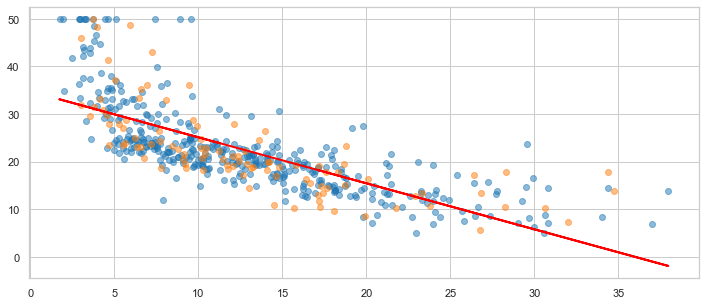

In [38]:
# Your code goes here
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")


## Evaluation

We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.

The coefficient $R^2$ is defined as:
$$R^2 = (1 - \textbf{u}/\textbf{v})$$
, where $\textbf{u}$ is the residual sum of squares: $$\textbf{u}=\sum (\textbf{y} - \widehat{\textbf{y}} )^2$$ where ${\textbf{y}}$ is the observed response and $\widehat{\textbf{y}}$ is the predicted response.

And $\textbf{v}$ is the total sum of squares: $$\textbf{v}=\sum (\textbf{y} - \bar{\textbf{y}})^2,$$ where $\bar{\textbf{y}}$ is the mean of the observed data.

The best possible score for $R^2$ is 1.0 (when $\textbf{u}=0$): lower values are worse. $R^2$ is 0.0 when $\textbf{u}=\textbf{v}$.


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>

Perform evaluation:
<ul>
<li>Using the model score</li>
<li>Using metrics from sklearn</li>

</ul>


</div>

#### Using the model score

The method score returns the coefficient of determination R^2 of the prediction.

In [39]:
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Score:')
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print(mse_train, mse_test)

Score:
0.55035012442359 0.517201889668442
MSE:
38.15659516139755 39.83939980089274


#### Using metrics from sklearn

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Make prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Compute Score
print('Score:')
print(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

# Compute MSE for training and testing sets 
print('MSE:')
print(mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test))


Score:
0.55035012442359 0.517201889668442
MSE:
38.15659516139755 39.83939980089274


#### Statistical evaluation with stats models

The ``statsmodels`` package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module.

We can perform the regression of the predictor on the response, using the ``sm.OLS`` class and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape ``(n, p)`` where $n$ is the number of data points and $p$ is the number of predictors. $\textbf{y}$ is either a one-dimensional numpy array or a pandas series of length $n$.

In [41]:
import statsmodels.api as sm
est = sm.OLS(y_train, X_train) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              328.5
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                    3.96e-54
Time:                        17:45:44   Log-Likelihood:                         -1743.9
No. Observations:                 404   AIC:                                      3490.
Df Residuals:                     403   BIC:                                      3494.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1336      0.063     18.125      0.000       1.011       1.257
==============================================================================
Omnibus:                        1.235   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                1.078
Skew:                           0.122   Prob(JB):                        0.583
Kurtosis:                       3.069   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Compare model performance

In [42]:
X_boston,y_boston = boston.data, boston.target # Create X matrix and y vector from the dataset.
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=.2)

In [43]:
# Score using a single feature
regr_feat1 = LinearRegression()
scores = []
n_features = boston.feature_names.shape[0]

for i in np.arange(n_features):
    # Select feature i
    feat_name = boston.feature_names[i]
    feat1_train=X_train[:,i:i+1]
    feat1_test=X_test[:,i:i+1]
    
    # Train model
    regr_feat1.fit(feat1_train, y_train)   
    
    # Predict
    y_train_pred = regr_feat1.predict(feat1_train)
    y_test_pred = regr_feat1.predict(feat1_test)
    
    # Evaluate model
    train_score = regr_feat1.score(feat1_train, y_train)
    test_score = regr_feat1.score(feat1_test, y_test)
    mse_train = np.mean((y_train_pred - y_train)**2)
    mse_test = np.mean((y_test_pred - y_test)**2)
    
    scores.append([train_score, test_score, mse_train, mse_test])

In [44]:
df_scores = pd.DataFrame(scores, columns=["train_score", "test_score","train_mse", "test_mse"], index=boston.feature_names)
df_scores.sort_values(by="test_score", ascending=False, inplace=True)
df_scores

,train_score,test_score,train_mse,test_mse
RM,0.445584,0.600583,45.491281,36.431824
LSTAT,0.533469,0.563778,38.280097,39.788963
PTRATIO,0.221209,0.352046,63.901819,59.101562
TAX,0.197785,0.267325,65.823829,66.829138
INDUS,0.218214,0.262018,64.147523,67.313252
NOX,0.180538,0.159188,67.238947,76.692637
RAD,0.132734,0.157626,71.161391,76.835089
CRIM,0.141267,0.149829,70.461264,77.546274
ZN,0.140392,0.057471,70.533027,85.970507
B,0.124403,0.035995,71.845005,87.929394


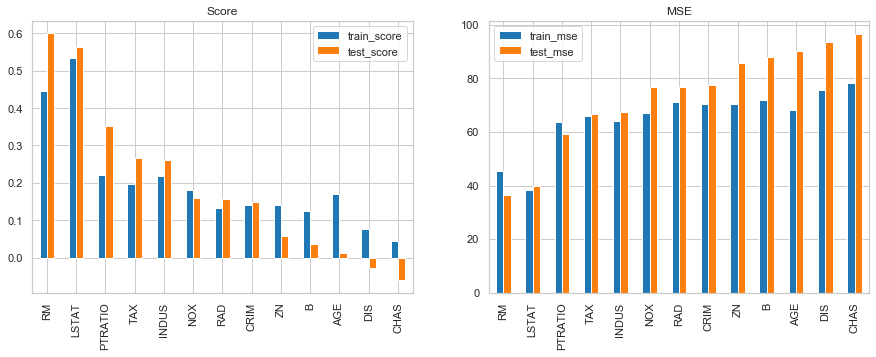

In [45]:
# Visualise train and test scores
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

df_scores[["train_score", "test_score"]].plot(kind="bar", ax=ax1, title='Score')
df_scores[["train_mse", "test_mse"]].plot(kind="bar", ax=ax2, title='MSE')

### Fitting a multiple linear model
It is possible as well to fit a multiple linear model, using all the variables:

In [46]:
X_train.shape

(404, 13)

In [47]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)


34.96270829379638 [-1.11381527e-01  4.28794948e-02  7.06951269e-03  3.33088617e+00
 -1.77661563e+01  3.74850850e+00 -3.30651460e-03 -1.43951964e+00
  3.27825557e-01 -1.17379741e-02 -9.33254194e-01  1.19350670e-02
 -4.84251462e-01]


In [48]:
# Compute Score for training and testing sets 
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)

print(train_score, test_score)

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print(mse_train, mse_test)

0.7175854832460484 0.8061646244793901
23.172840598977135 17.68021794617368


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
**EXERCISE 1: Climate Change and Sea Ice Extent**<p>

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements from the [National Snow & Ice Data Center](https://nsidc.org).<p>

We perform the following processing steps:

</li>
<ol>
<ul>
</ul>
<li> We must read and clean the data.
<li> To compute the tendency for a given interval of time (month), we need to normalize the data.
<li> This values can be plotted for the entire time series or for particular months. 
<li> We can compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.
<li> We can also estimate the extent value for 2025.

</ol>
</div>

In [49]:
# Load the data and show the info and contents:
import pandas as pd
ice = pd.read_csv('files/ch06/SeaIce.txt',delim_whitespace=True)
print('shape: {}'.format(ice.shape))
ice.head() 

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


To compute the anomaly for a given interval of time, we can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend), before data cleaning.

In [50]:
# Your code here

## Visualization

### The importance of plotting

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties.

<center><img src="files/images/Anscombe's_quartet_3.svg"  width="600"></center>

Source [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).



### Example 1: Housing Data

We'll continue with our Boston housing dataset

In [51]:
# Load datayou
from sklearn import datasets
boston = datasets.load_boston() # Dictionary-like object that exposes its keys as attributes.
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) # Create a DataFrame from the Boston dataset
df_boston['PRICE'] = boston.target
print('Shape of data: {}'.format(df_boston.shape))

Shape of data: (506, 14)


### Histograms

Text(0, 0.5, 'count')

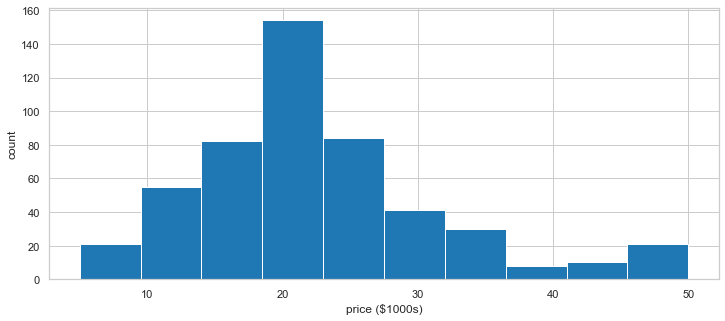

In [52]:
# Histogram of prices:
plt.hist(df_boston.PRICE) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

### Linear Regression Visualization: Seaborn lmplot

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas ``DataFrame``. To plot, provide the predictor and response variable names along with the dataset

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".
Seaborn visualization can be used to show this linear relationships easily:

We will use the variable price as our response $\textbf{y}$ and LSTAT as our predictor $\textbf{x}$.


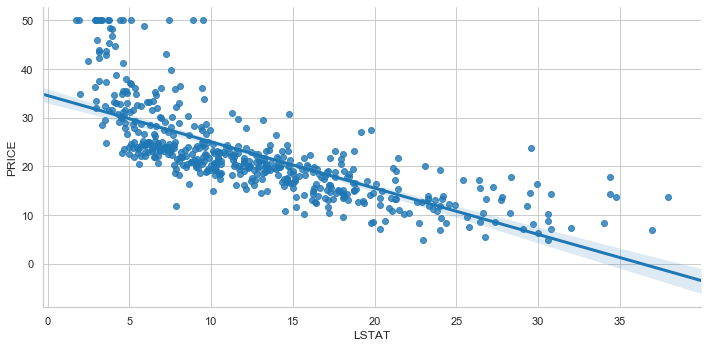

In [53]:
# Visualization of the relations between price and LSTAT
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2);

lmplot has two main components. 

+ The first is a scatterplot, showing the observed datapoints. 
+ The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model (using Bootstraping).

Is the relationship between the house price and ``lstat`` non-linear? Is the straight line a poor fit? Maybe a better fit can be obtained by including higher order terms:

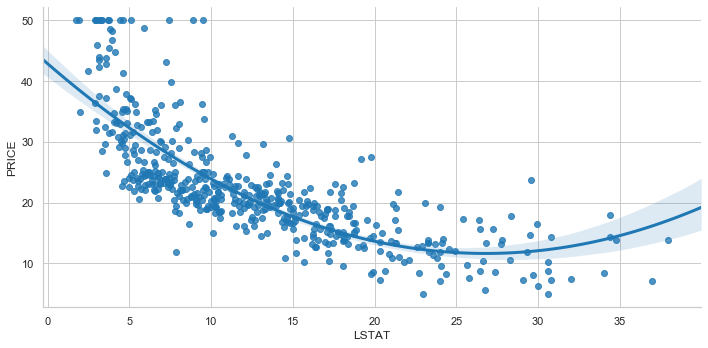

In [54]:
# Estimate a polynomial regression of order 2
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2, order=2);

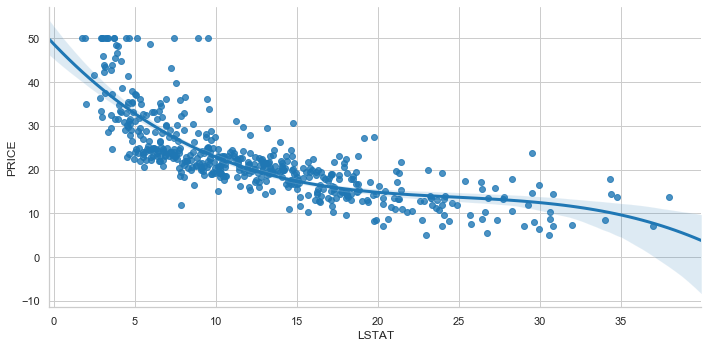

In [55]:
# Estimate a polynomial regression of order 3
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2, order=3);


What if we consider variable RM or AGE?

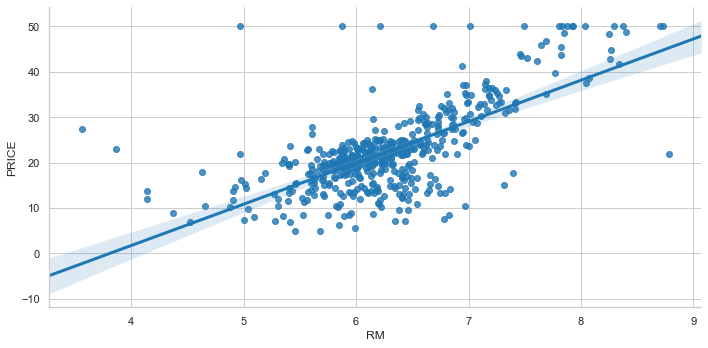

In [56]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot(x="RM", y="PRICE", data=df_boston, aspect=2);

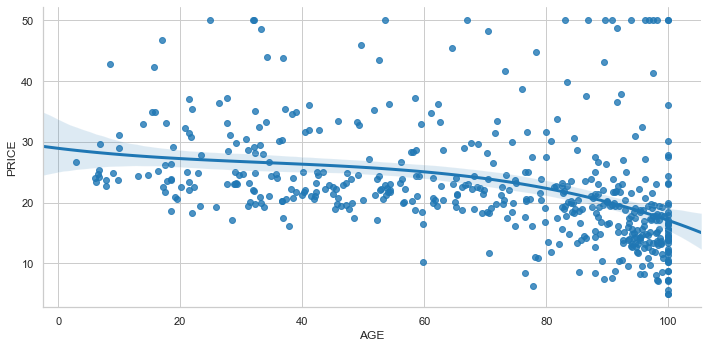

In [57]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="AGE", y="PRICE", data=df_boston, aspect=2, order=3);

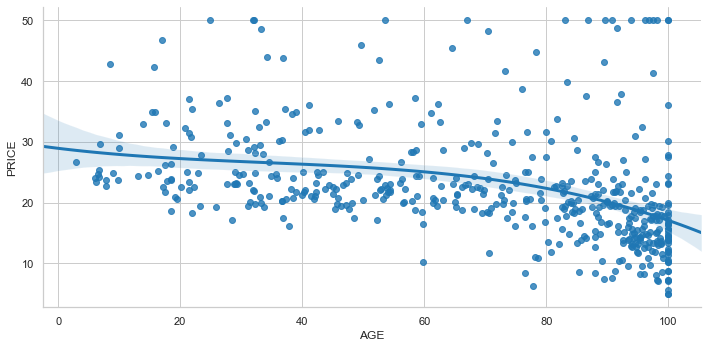

In [58]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="AGE", y="PRICE", data=df_boston, aspect=2, order=3);

### Heatmap

We can also use corr function from Pandas and heatmap function from Seaborn for studying the variables relationship, plotting a diagonal correlation matrix.

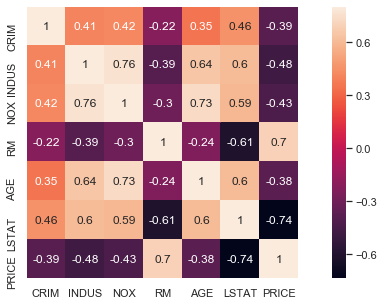

In [59]:
features2 = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'LSTAT', 'PRICE'] # To plot just 7 of the 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
df_boston2 = df_boston[features2]
corrmat = df_boston2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Scatter plot matrix

Let's explore multiple variables relationships using a scatter plot matrix. The scatter plot is a grid of plots of multiple varaibles one against the other, showing the pairwise relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables:

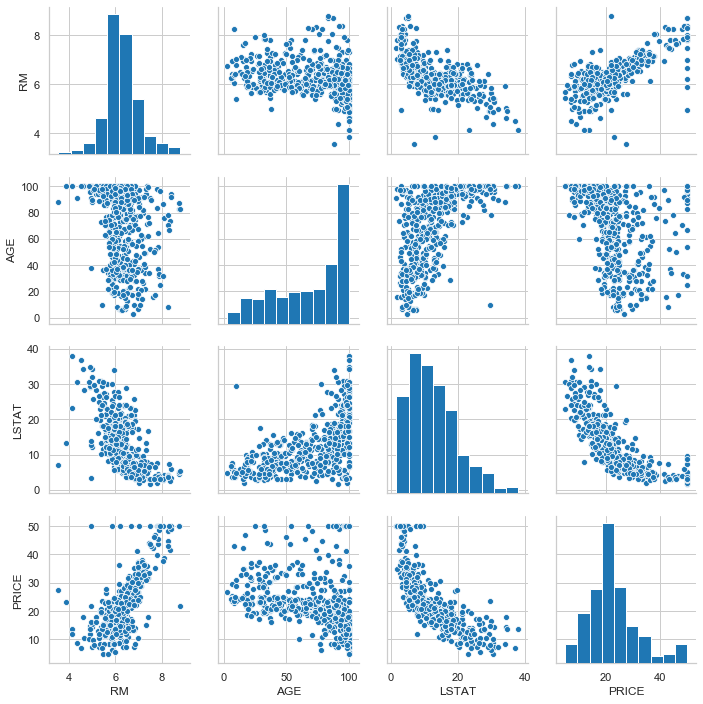

In [60]:
features3 = ['RM','AGE','LSTAT', 'PRICE'] 
df_boston3 = df_boston[features3]
sns.pairplot(df_boston3) # Plot pairwise relationships in the dataset

We can visually analyze the pairwise relationships in the scatter plots. The diagonal axe contains a plot to show the univariate distribution of the data for the variable in that column.

You can create the same scatter plot matrix using the scatter_matrix method in pandas.tools.plotting:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ca14f28>,
      dtype=object)

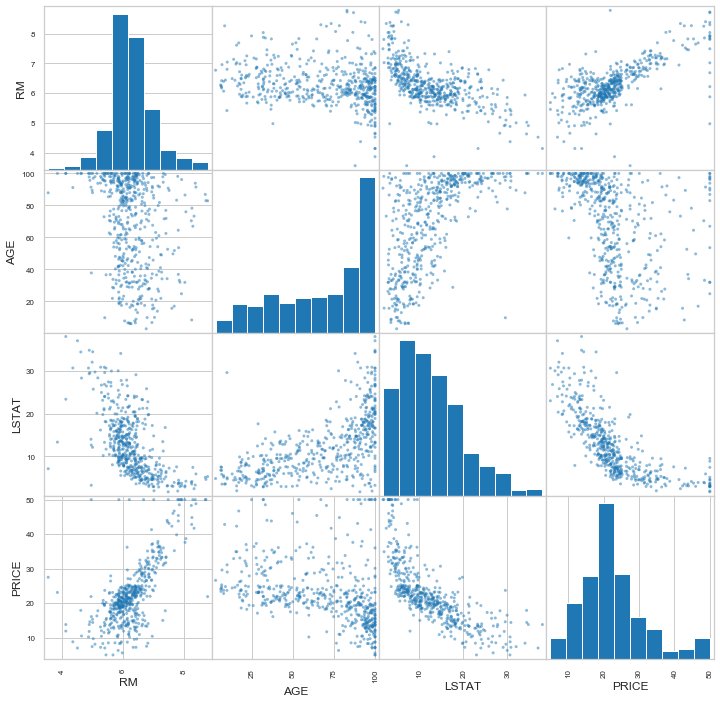

In [61]:
pd.plotting.scatter_matrix(df_boston3, figsize=(12.0,12.0))  

**Plots for the fitting evaluation:**

We can often learn a lot about how well our model did by analyzing the predictions and residuals with two interesting plots: 
- An scatter plot of the observed values $y$ versus the predicted value $\hat y$ 
- An scatter plot residuals $y_i - \hat y_i$ vs. $\hat y_i$.

In both cases we can add a line to show which would be the perfect result. 

Text(0, 0.5, 'Predicted price ($1000s)')

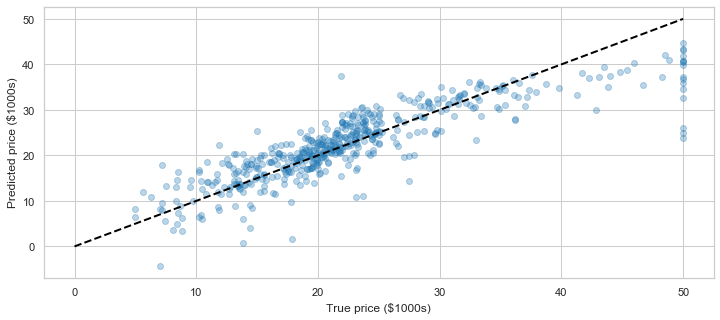

In [62]:
X = boston.data
y = boston.target

reg = LinearRegression() # Create the Linear Regression estimator
reg.fit(X, y) # Fitting with all the features
y_pred = reg.predict(X) # Perform prediction of all the data

# Visualization of target and predicted responses of the boston data:
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Text(0, 0.5, '$y - \\hat y$')

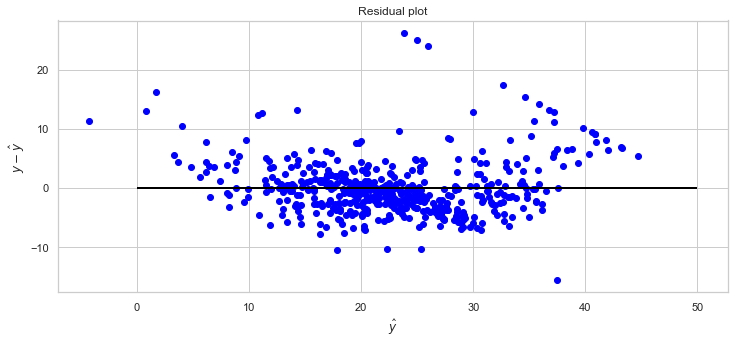

In [63]:
x_plot = plt.scatter(y_pred, (y-y_pred), c='b')
plt.hlines(y=0, xmin= 0, xmax=50)
plt.title('Residual plot')
plt.xlabel('$\hat y$')
plt.ylabel('$y - \hat y$')

Intuitively, if the model is good, then a plot of the residuals ($y_i - \hat y_i$) against the fitted values ($\hat y_i$) should look like noise (i.e., there shouldn't be any visible patterns).

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 2** Diabetes <p>

The diabetes dataset (from scikit-learn) consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.<p>

We will divide in training and testing sets and evaluate the prediction (using sklearn) with a simple and a multiple regression model.<p>

Fill the gaps of the exercise.

</div>

In [64]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X,y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names
print(X.shape, y.shape)
print(feature_names)

(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


First visualize the data. Plot a histogram of the target variable.

In [65]:
# Your code here

Divide in training and testing sets

In [66]:
# Your code here

For the simple model, first choose one of the dimensions of the data. Try some plots to identify possible linear relationships between the predictor and target variables. Pick one variable for your first model.

In [67]:
# Your code here

Visualize the data using scatter plot (plt.scatter):

In [68]:
# Your code here

Visualize the data using scatter plot (plt.scatter) and two different colors for train and test data:

In [69]:
# Your code here

Train and evaluate the score of the test set.

In [70]:
# Your code here

Calculate the Mean Squared Error on the train and test set:

In [71]:
# Your code here

Visualize the predicted line together with a scatter plot of the training set.

In [72]:
# Your code here

Visualize the predicted line together with a scatter plot of the training set.

In [73]:
# Your code here

For multiple regression model divide in training and testing sets and evaluate the prediction (sklearn)

In [74]:
# Your code here

Is the score improving using all 10 variables?

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Exercice 3: Macroeconomic Dataset**<p>
    
In the following example we will use the Longley dataset of US macroeconomic data from the R datasets website. We want to explore the relationships between the Total Derived Employment ('Employed') and the other variables.

<ul>
<li>Is there a linear relationship between the Gross National Product ('GNP') and the Total Derived Employment ('Employed')?</li>
<li>Is there a linear relationship between the population and the Total Derived Employment ('Employed')?</li>
<li>Is there a linear relationship between the armed forces and the unemployed?</li>
<li>Can you see any non-linear effects between the armed forces and the unemployed?</li>
<li>Try to use higher order models to the fitting of GNP with Population.</li>
</ul>
    
</div>

In [75]:
import pandas as pd
# Read data
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


Is there a linear relationship between the Gross National Product ('GNP') and the Total Derived Employment ('Employed')?

In [76]:
# Your code goes here

Is there a linear relationship between the population and the Total Derived Employment ('Employed')?

In [77]:
# Your code goes here

Is there a linear relationship between the armed forces and the unemployed?

In [78]:
# Your code goes here

Can you see any non-linear effects between the armed forces and the unemployed?

In [79]:
# Your code goes here

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 4: Advertising dataset**<p>


In the following example we will use the [advertising dataset](https://www.kaggle.com/purbar/advertising-data/data)which consists of the sales of products and their advertising budget in three different media TV, radio, newspaper.<p>
<ul>
    <li>Is there a linear relationship between the sales of products and the advertising budget in TV, radio or newspapers?</li>
    <li>Train a simple linear model for each variable to predict sales</li>
    <li>Train a multiple linear model to predict sales</li>
    <li>Compare the different models. Which one's performed best?</li>
</ul>

Dataset from the book: "An Introduction to Statistical Learning with Applications in R”. Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.<p>


</div>